# Support Vector Machine (SVM)

1. Basic Concept
2. Linear SVM Classification
3. Polynomial Kernel
4. Radial Basis Function
5. Support Vector Regression

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set_style('whitegrid')

In [2]:
print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)
print(sns.__version__)
print(sklearn.__version__)

1.17.4
0.25.3
3.2.1
0.10.0
0.22.1


## 1. Basic Concept of SVM:

**Support Vector Machine (SVM)** is one of the most popular and common supervised ML algorithm, which can be used for classification and regression purpose and also outliers detection. It can handle both linear and non-linear data. To handle non linear data SVM uses kernel trick that means first transform the data into some other dimension from which we can easily classify the data (like from 2-d to 3-d projection).

**SVM classifies the data by generating or locating the hyperplane (decision boundary) between the classes that best separates the classes in such a way that there is largest margin between classes. The samples that are closest to the hyperplane are called as support vectors.**



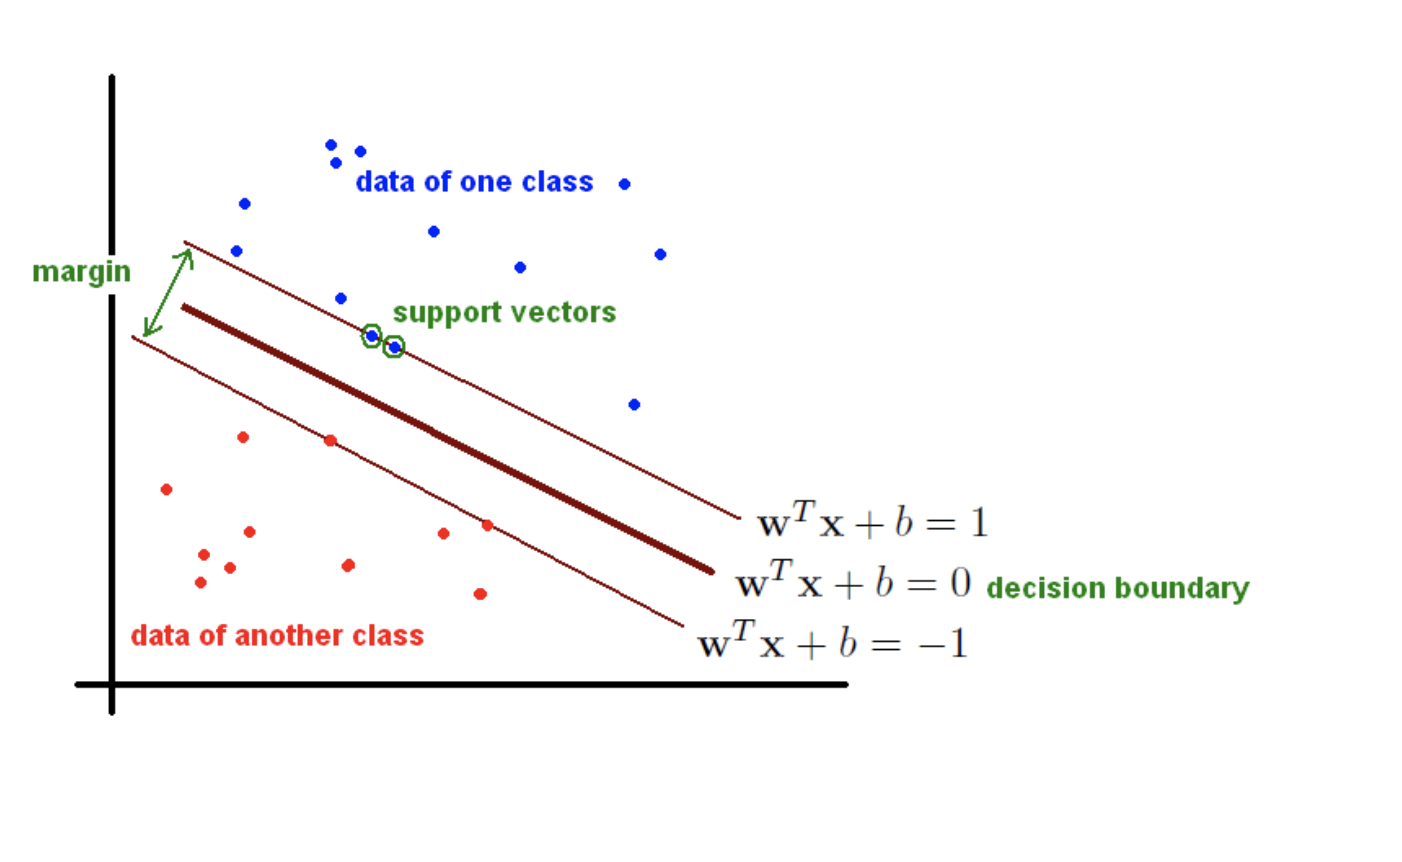

In [3]:
from IPython.display import Image

Image("D:\\PycharmProjects\\UdemyML\\svm1.png",width = 600)


## 2. Linear SVM Classification:

Key Points: **SVM is sensitive to Feature Scaling.**
   1. Support Vectors are data points having least distance from hyperplane.
   
   2. In linear svm, classes are separated with a straight line (linearly separable).
   
   3. Margin : distance b/w the support vectors of different classes. width of margin should be as maximum as possible.
   

**Hard Margin Classification:** Strictly based on those that are at the margin between 2 classes.Theses margins are sensitive to outliers.

**Soft Margin Classification:** Mostly used soft margin classification. we can widen the margin and allows for violation. Python's sklearn provides the **'C'** hyperparameter to control the margin width. If -

> **smaller 'C'** leads to **wider margin** but more margin violations.

> **larger 'C'** leads to fewer margin violations but ends up with **smaller margin**.


In [4]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
col = ['petal_length','petal_width','species']
data = df.loc[:,col]
data.head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [6]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
colx = ['petal_length','petal_width']
x = df.loc[:,colx]
x.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [8]:
label_to_num = {'setosa' : 0,
                'versicolor' : 1,
                'virginica' : 2}

y = df.loc[:,col[2]].map(label_to_num)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

### LinearSVC:    Linear Support Vector Classification

Similar to SVC with parameter **kernel=’linear’**, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

### SVC : C-Support Vector Classification

The implementation is based on libsvm. The fit time scales at least quadratically with the number of samples and may be impractical for large dataset. 
For large datasets consider using *sklearn.svm.LinearSVC* or *sklearn.linear_model.SGDClassifier*.

In [9]:
from sklearn import svm

In [10]:
C = 0.001
clf = svm.SVC(kernel = 'linear',C = C)
clf.fit(x,y)

SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
clf.predict([[6,2]])

array([2], dtype=int64)

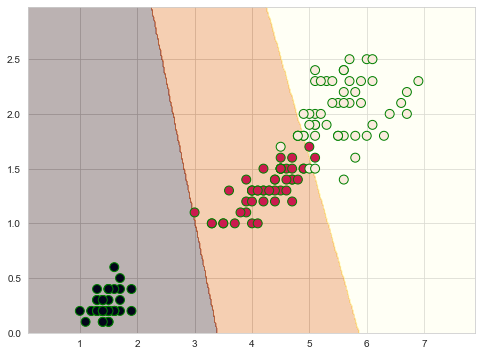

In [12]:
xv = x.values.reshape(-1,1)
h = 0.02
xmin,xmax = xv.min(),xv.max() + 1
ymin, ymax = y.min(), y.max() + 1
xx,yy = np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))

z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize = (8,6))
ax = plt.contourf(xx,yy,z,cmap = 'afmhot',alpha = 0.3)
plt.scatter(x.values[:,0],x.values[:,1],c=y,s = 80, alpha = 1,edgecolors = 'g')

#### Actual implementation [LinearSVM]

In [13]:
# Linear svm using train-test-split
df = sns.load_dataset('iris')

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [14]:
colx = ['petal_length','petal_width'] 

x = df.loc[:,colx] # get independent variable

label_to_num = {'setosa' : 0,
                'versicolor' : 1,
                'virginica' : 2}

y = df.loc[:,col[2]].map(label_to_num) # get dependent variable

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 0) # preform train_test_split

sc = StandardScaler() # scale the x_train and x_test
x_std_train = sc.fit_transform(x_train)
x_std_test = sc.fit_transform(x_test)

In [15]:
C = 1.0 # set hyperparameter 'C'

lModel = svm.SVC(kernel = 'linear', C = C) # instantiate model with kernel = 'linear'
lModel.fit(x_std_train,y_train) # fit the model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
# cross validation to get avg accuracy and std

score = cross_val_score(lModel,x_std_train,y_train,cv =10, scoring = 'accuracy' )
print("avg accuracy:\t{0:,.4f}".format(np.mean(score)))
print("avg std:\t{0:,.4f}".format(np.std(score)))


avg accuracy:	0.9500
avg std:	0.0553


In [17]:
y_pred = cross_val_predict(lModel,x_std_train,y_train,cv =3) # get prediction values for train data

In [18]:
confusion_matrix(y_train,y_pred )# get CM for train data

array([[39,  0,  0],
       [ 0, 34,  3],
       [ 0,  3, 41]], dtype=int64)

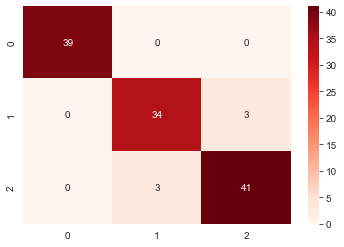

In [19]:
sns.heatmap(confusion_matrix(y_train,y_pred),annot = True,cmap = 'Reds') # plot CM for train data

In [20]:
precision_score(y_train,y_pred,average = 'weighted') # get precision score for train data

0.95

In [21]:
recall_score(y_train,y_pred,average = 'weighted')# get recall score for train data

0.95

In [22]:
f1_score(y_train,y_pred,average = 'weighted')# get f1 score for train data

0.95

In [23]:
# Prediction for test data
 
y_testpred = cross_val_predict(lModel,x_std_test,y_test,cv =3) 


In [24]:
confusion_matrix(y_test,y_testpred) # get CM for test data


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]], dtype=int64)

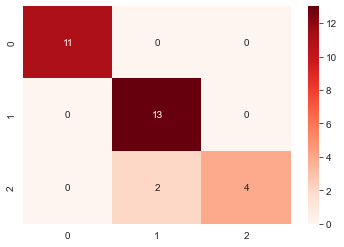

In [25]:
sns.heatmap(confusion_matrix(y_test,y_testpred),annot = True,cmap = 'Reds') # plot CM  for test data

In [26]:
precision_score(y_test,y_testpred,average = 'weighted') # get precision score for test data

0.9422222222222222

In [27]:
recall_score(y_test,y_testpred,average = 'weighted')# get recall score for test data

0.9333333333333333

In [28]:
f1_score(y_test,y_testpred,average = 'weighted')# get f1 score for test data

0.929047619047619

## 3. Polynomial Kernel:

> To handle non linear data (data not seperated by straight line), svm uses **Kernel Trick** . 

> Use **kernel = poly**  with **degree** of polynomial in hyperparameter tuning.

>  **Kernel Trick** : Transforming the data into some other dimension so that we can easily generate the hyperplane and classify the data.

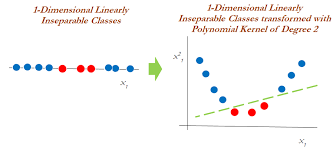

In [29]:
from IPython.display import Image

Image("D:\\PycharmProjects\\UdemyML\\svm2.png",width = 600)

In [30]:
C = 1.0

clf = svm.SVC(kernel = 'poly', degree = 3, C = C, gamma = 'auto')
clf.fit(x, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
clf.predict([[6,2]])

array([2], dtype=int64)

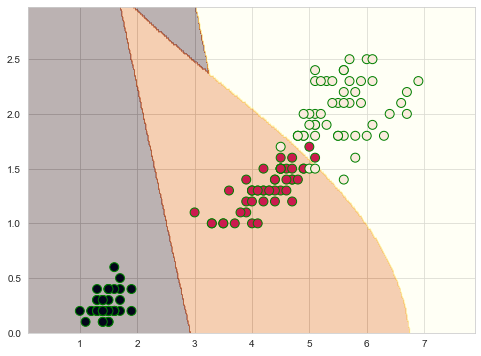

In [32]:
xv = x.values.reshape(-1,1)
h = 0.02
xmin,xmax = xv.min(),xv.max() + 1
ymin, ymax = y.min(), y.max() + 1
xx,yy = np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))

z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize = (8,6))
ax = plt.contourf(xx,yy,z,cmap = 'afmhot',alpha = 0.3)
plt.scatter(x.values[:,0],x.values[:,1],c=y,s = 80, alpha = 1,edgecolors = 'g')

#### Actual implementation [PolySVM]

In [33]:
# Poly svm using train-test-split
df = sns.load_dataset('iris')

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

colx = ['petal_length','petal_width'] 

x = df.loc[:,colx] # get independent variable

label_to_num = {'setosa' : 0,
                'versicolor' : 1,
                'virginica' : 2}

y = df.loc[:,col[2]].map(label_to_num) # get dependent variable

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 0) # preform train_test_split

sc = StandardScaler() # scale the x_train and x_test
x_std_train = sc.fit_transform(x_train)
x_std_test = sc.fit_transform(x_test)

C = 1.0 # set hyperparameter 'C'

pModel = svm.SVC(kernel = 'poly', degree = 10, C = C, gamma = 'auto') # instantiate model with kernel = 'poly'
pModel.fit(x_std_train,y_train) # fit the model



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=10, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

avg accuracy:	0.7833
avg std:	0.1404
Confusion Matrix:
 [[35  0  4]
 [ 0 37  0]
 [ 7 18 19]]
Precision score:0.7812
recall score:0.7583
f1 score:0.7368
test Confusion Matrix:
 [[ 9  2  0]
 [ 0 13  0]
 [ 2  2  2]]
test Precision score:0.8314
test recall score:0.8000
test f1 score:0.7756


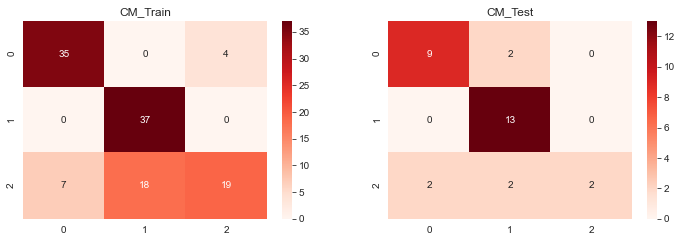

In [34]:
# cross validation to get avg accuracy and std
score1 = cross_val_score(pModel,x_std_train,y_train,cv =10, scoring = 'accuracy' )
print("avg accuracy:\t{0:.4f}".format(np.mean(score1)))
print("avg std:\t{0:.4f}".format(np.std(score1)))

# get prediction and metrics values for train data
y_pred = cross_val_predict(pModel,x_std_train,y_train,cv =3) 
print("Confusion Matrix:\n",confusion_matrix(y_train,y_pred ))
print("Precision score:{0:,.4f}".format(precision_score(y_train,y_pred,average = 'weighted' )))
print("recall score:{0:,.4f}".format(recall_score(y_train,y_pred ,average = 'weighted')))
print("f1 score:{0:,.4f}".format(f1_score(y_train,y_pred,average = 'weighted' )))

# get prediction and metrics values for test data
y_testpred = cross_val_predict(pModel,x_std_test,y_test,cv =3) 
print("test Confusion Matrix:\n",confusion_matrix(y_test,y_testpred ))
print("test Precision score:{0:.4f}".format(precision_score(y_test,y_testpred,average = 'weighted' )))
print("test recall score:{0:.4f}".format(recall_score(y_test,y_testpred ,average = 'weighted')))
print("test f1 score:{0:.4f}".format(f1_score(y_test,y_testpred,average = 'weighted' )))

plt.figure(figsize = (12,8))
plt.subplot(2,2,1)
plt.title("CM_Train")
sns.heatmap(confusion_matrix(y_train,y_pred),annot = True,cmap = 'Reds') # plot CM  for test data
plt.subplot(2,2,2)
plt.title("CM_Test")
sns.heatmap(confusion_matrix(y_test,y_testpred),annot = True,cmap = 'Reds') # plot CM  for test data

## 4. Gaussian Radial Basis Kernel:

The kernel fn can be any of the following:
1. **Linear**: $<X,X^{'}>$
2. **Polynomial**: $(\gamma <X,X^{'}> + r)^{d}$ , where , **r** is **coef0** and **d** is **degree**.
3. **rbf**: $\exp(-\gamma ||X-X^{'}||^{2})$, where, **$\gamma$** is **gamma** ; **$\gamma$ > 0**
4. **sigmoid**: $(tanh(\gamma <X,X^{'}> + r))$ , where , **r** is **coef0**.


**Radial-basis function kernel (aka squared-exponential kernel)**:

The RBF kernel is a stationary kernel. It is also known as the “squared exponential” kernel. It is parameterized by a length scale parameter $l > 0$ , which can either be a scalar (isotropic variant of the kernel) or a vector with the same number of dimensions as the inputs X (anisotropic variant of the kernel). The kernel is given by:
 $k(x_i, x_j) = \exp\left(- \frac{d(x_i, x_j)^2}{2l^2} \right)$
,where $l$ is the length scale of the kernel and $d(x_i,x_j)$ is the Euclidean distance. 

In [35]:


# rbf svm using train-test-split
df = sns.load_dataset('iris')

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

colx = ['petal_length','petal_width'] 

x = df.loc[:,colx] # get independent variable

label_to_num = {'setosa' : 0,
                'versicolor' : 1,
                'virginica' : 2}

y = df.loc[:,col[2]].map(label_to_num) # get dependent variable

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 0) # preform train_test_split

sc = StandardScaler() # scale the x_train and x_test
x_std_train = sc.fit_transform(x_train)
x_std_test = sc.fit_transform(x_test)

C = 1.0 # set hyperparameter 'C'

pModel = svm.SVC(kernel = 'rbf',C = C, gamma = 0.7) # instantiate model with kernel = 'poly'
pModel.fit(x_std_train,y_train) # fit the model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

avg accuracy:	0.9500
avg std:	0.0553
Confusion Matrix:
 [[39  0  0]
 [ 0 35  2]
 [ 0  3 41]]
Precision score:0.9586
recall score:0.9583
f1 score:0.9584
test Confusion Matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  2  4]]
test Precision score:0.9422
test recall score:0.9333
test f1 score:0.9290


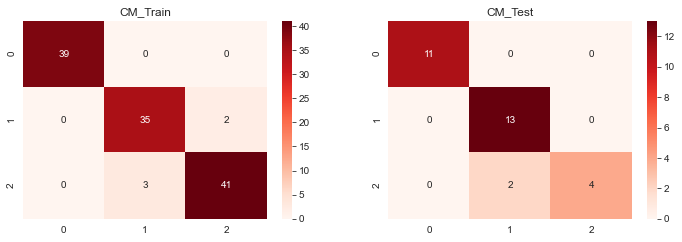

In [36]:
# cross validation to get avg accuracy and std
score1 = cross_val_score(pModel,x_std_train,y_train,cv =10, scoring = 'accuracy' )
print("avg accuracy:\t{0:.4f}".format(np.mean(score1)))
print("avg std:\t{0:.4f}".format(np.std(score1)))

# get prediction and metrics values for train data
y_pred = cross_val_predict(pModel,x_std_train,y_train,cv =3) 
print("Confusion Matrix:\n",confusion_matrix(y_train,y_pred ))
print("Precision score:{0:,.4f}".format(precision_score(y_train,y_pred,average = 'weighted' )))
print("recall score:{0:,.4f}".format(recall_score(y_train,y_pred ,average = 'weighted')))
print("f1 score:{0:,.4f}".format(f1_score(y_train,y_pred,average = 'weighted' )))

# get prediction and metrics values for test data
y_testpred = cross_val_predict(pModel,x_std_test,y_test,cv =3) 
print("test Confusion Matrix:\n",confusion_matrix(y_test,y_testpred ))
print("test Precision score:{0:.4f}".format(precision_score(y_test,y_testpred,average = 'weighted' )))
print("test recall score:{0:.4f}".format(recall_score(y_test,y_testpred ,average = 'weighted')))
print("test f1 score:{0:.4f}".format(f1_score(y_test,y_testpred,average = 'weighted' )))

plt.figure(figsize = (12,8))
plt.subplot(2,2,1)
plt.title("CM_Train")
sns.heatmap(confusion_matrix(y_train,y_pred),annot = True,cmap = 'Reds') # plot CM  for test data
plt.subplot(2,2,2)
plt.title("CM_Test")
sns.heatmap(confusion_matrix(y_test,y_testpred),annot = True,cmap = 'Reds') # plot CM  for test data

### Grid Search: Tuning the hyperparameters of an estimator.

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline

In [38]:
pipeline = Pipeline([('pModel',svm.SVC(kernel='rbf',C = 1,gamma = 0.1))])  # get no.of estimators

params = { 'pModel__C':(0.1,0.5,1,2,5,10,20),
             'pModel__gamma':(0.001,0.01,0.1,0.25,0.5,0.75,1)}  # get many parameters to be tuned

gridS_model = GridSearchCV(pipeline,params,n_jobs = -1,cv = 3,  verbose = 1,scoring = 'accuracy') # create grid model

gridS_model.fit(x_train,y_train) # fit the grid model

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 132 out of 147 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    1.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pModel',
                                        SVC(C=1, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma=0.1, kernel='rbf',
                                            max_iter=-1, probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'pModel__C': (0.1, 0.5, 1, 2, 5, 10, 20),
                         'pModel__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75,
                                           1)},
   

In [39]:
gridS_model.best_score_ # get the best score or accuracy

0.9583333333333334

In [40]:
best = gridS_model.best_estimator_.get_params() 
best

{'memory': None,
 'steps': [('pModel',
   SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
       max_iter=-1, probability=False, random_state=None, shrinking=True,
       tol=0.001, verbose=False))],
 'verbose': False,
 'pModel': SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'pModel__C': 0.5,
 'pModel__break_ties': False,
 'pModel__cache_size': 200,
 'pModel__class_weight': None,
 'pModel__coef0': 0.0,
 'pModel__decision_function_shape': 'ovr',
 'pModel__degree': 3,
 'pModel__gamma': 0.5,
 'pModel__kernel': 'rbf',
 'pModel__max_iter': -1,
 'pModel__probability': False,
 'pModel__random_state': None,
 'pModel__shrinking': True,
 'pModel__tol': 0.001,
 'pModel__verbose': False}

In [41]:
for k in sorted(params.keys()):
    print(k,":", best[k])

pModel__C : 0.5
pModel__gamma : 0.5


In [42]:
y_testpred = gridS_model.predict(x_test)

In [43]:
confusion_matrix(y_test,y_testpred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [44]:
print("test Precision score:{0:.4f}".format(precision_score(y_test,y_testpred,average = 'weighted' )))
print("test recall score:{0:.4f}".format(recall_score(y_test,y_testpred ,average = 'weighted')))
print("test f1 score:{0:.4f}".format(f1_score(y_test,y_testpred,average = 'weighted' )))


test Precision score:1.0000
test recall score:1.0000
test f1 score:1.0000


## 5. Support Vector Regression (SVR):

In [45]:
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston

In [46]:
data = load_boston()
df = pd.DataFrame(data.data,columns = data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [47]:
y = data.target

In [48]:
x = df[['LSTAT']].values

In [49]:
reg = svm.SVR(gamma = 'auto')
reg.fit(x,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [50]:
sort_idx = x.flatten().argsort()

In [51]:
y_pred = reg.predict(x[sort_idx])

Text(0, 0.5, 'MEDV')

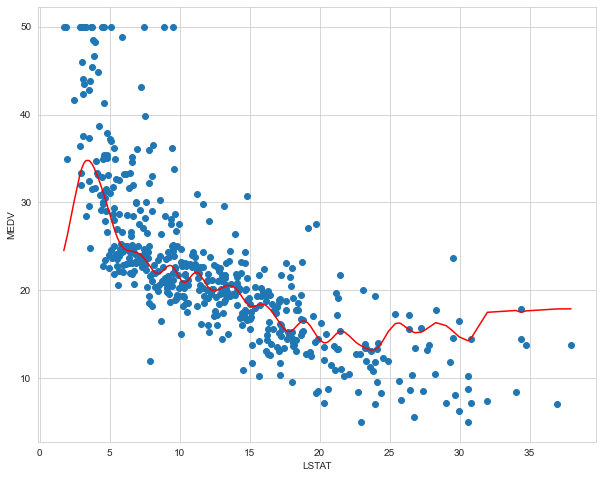

In [52]:
plt.figure(figsize = (10,8))
plt.scatter(x[sort_idx],y[sort_idx])
plt.plot(x[sort_idx],y_pred,color = 'r')

plt.xlabel('LSTAT')
plt.ylabel('MEDV')

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)
y_train.shape

(354,)

In [54]:
# linear kernel


svr = svm.SVR(kernel = 'linear')
svr.fit(x_train,y_train)

y_trainpred = svr.predict(x_train)
y_testpred = svr.predict(x_test)

print("MSE_train:{0:.4f}\nMSE_test:{1:.4f}".format(mean_squared_error(y_train,y_trainpred),mean_squared_error(y_test,y_testpred)))
print("r2_train:{0:.4f}\nr2_test:{1:.4f}".format(r2_score(y_train,y_trainpred),r2_score(y_test,y_testpred)))

MSE_train:41.8187
MSE_test:36.8372
r2_train:0.5242
r2_test:0.5056


In [55]:
# poly kernel

svr = svm.SVR(kernel = 'poly',C = 1e3, degree = 2, gamma = 'auto' )
svr.fit(x_train,y_train)

y_trainpred = svr.predict(x_train)
y_testpred = svr.predict(x_test)

print("MSE_train:{0:.4f}\nMSE_test:{1:.4f}".format(mean_squared_error(y_train,y_trainpred),mean_squared_error(y_test,y_testpred)))
print("r2_train:{0:.4f}\nr2_test:{1:.4f}".format(r2_score(y_train,y_trainpred),r2_score(y_test,y_testpred)))

MSE_train:110.3334
MSE_test:114.3676
r2_train:-0.2553
r2_test:-0.5349


In [56]:
# rbf kernel

svr = svm.SVR(kernel = 'rbf', C = 1e3, gamma = 0.1)
svr.fit(x_train,y_train)

y_trainpred = svr.predict(x_train)
y_testpred = svr.predict(x_test)

print("MSE_train:{0:.4f}\nMSE_test:{1:.4f}".format(mean_squared_error(y_train,y_trainpred),mean_squared_error(y_test,y_testpred)))
print("r2_train:{0:.4f}\nr2_test:{1:.4f}".format(r2_score(y_train,y_trainpred),r2_score(y_test,y_testpred)))

MSE_train:27.5635
MSE_test:26.7051
r2_train:0.6864
r2_test:0.6416


# 6. Adavantages & Disadvantages:

**Advantages:**
1. SVM works relatively well when there is clear margin of separation between classes.
2. SVM is more effective in high dimensional spaces.
3. SVM is effective in cases where number of dimensions is greater than the number of samples.
4. SVM is relatively memory efficient.
5. Uses only a subset of training data(support vectors) in the decision fn, used by many kernels like linear,polynomial,rbf,sigmoid,custom.

**Disadvantages:**
1. SVM algorithm is not suitable for large data sets.
2. SVM does not perform very well, when the data set has more noise i.e. target classes are overlapping.
3. In cases where number of features for each data point exceeds the number of training data sample , the SVM will under perform or chances of overfitting.
4. As the support vector classifier works by putting data points, above and below the classifying hyper plane there is *no probabilistic explanation* for the classification.
5. choice of kernels and regularization can have large impact on performance.